In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.1.5
1.19.5
0.11.2


In [ ]:

df1 = pd.read_csv('/content/drive/MyDrive/bike_buyers_clean.csv')


In [ ]:
df1.isnull().sum()

ID                   0
married              7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
has_bike             0
dtype: int64

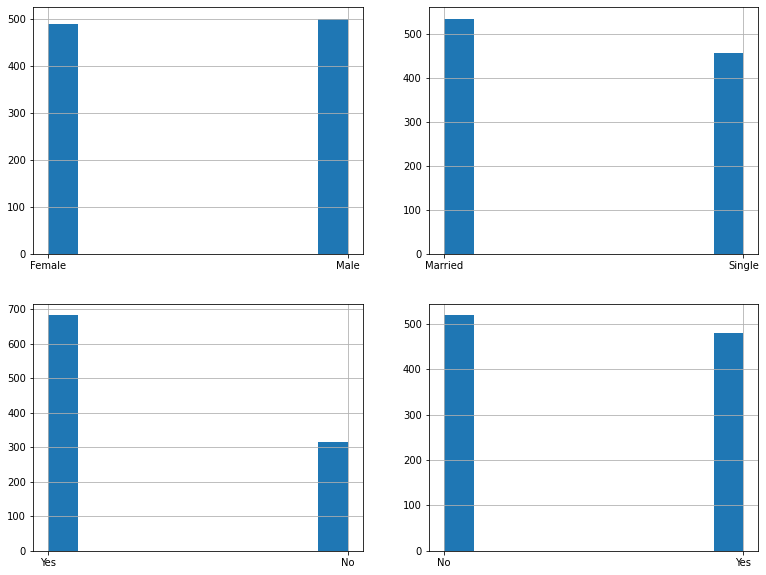

In [ ]:
cols = ['Gender','married','Home Owner','has_bike']

i = 0

j = 0

k = 0

fig,ax = plt.subplots(2,2,figsize = (13,10))

for i in range(2):

    for j in range(2):

        df1[cols[k]].hist(ax=ax[i][j])

        k = k+1



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


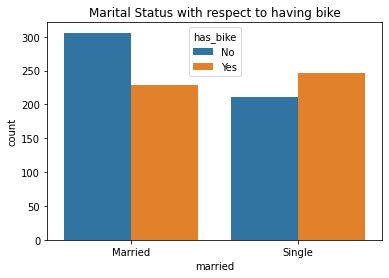

In [ ]:
plt.title('Marital Status with respect to having bike')

sns.countplot(df1['married'],hue = df1['has_bike'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


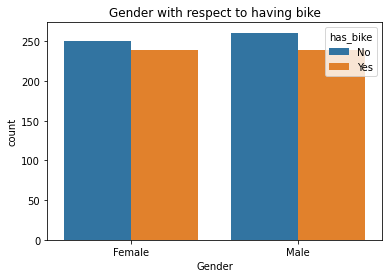

In [ ]:
plt.title('Gender with respect to having bike')

sns.countplot(df1['Gender'],hue = df1['has_bike'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


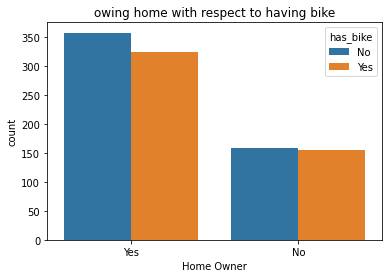

In [ ]:
plt.title('owing home with respect to having bike')

sns.countplot(df1['Home Owner'],hue = df1['has_bike'])

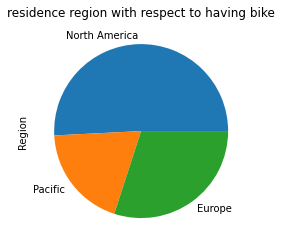

In [ ]:
plt.title('residence region with respect to having bike')
df1.Region.value_counts(sort=False).plot.pie()

plt.show()

In [ ]:
df1

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


In [ ]:
df1.rename(columns={'Purchased Bike':'bike','Marital Status':'married','Home Owner':'homeowner','Commute Distance':'distance'},inplace=True)
df1.head(10)

,ID,married,Gender,Income,Children,Education,Occupation,homeowner,Cars,distance,Region,Age,bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No
6,27974,Single,Male,160000,2,High School,Management,Yes,4,0-1 Miles,Pacific,33,Yes
7,19364,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,43,Yes
8,22155,Married,Male,20000,2,Partial High School,Clerical,Yes,2,5-10 Miles,Pacific,58,No
9,19280,Married,Male,20000,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,48,Yes


In [ ]:
xs = df1.bike

xs = np.array(xs)

s = []

for i in xs:

    if i == "Yes":

        s.append(1)

    elif i == "No":

        s.append(0)

    else :

        s.append(0)

s = np.array(s)

df1.bike = s

df1.bike

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: bike, Length: 1000, dtype: int64

In [ ]:
xm = df1.married

xm = np.array(xm)

m = []

for i in xm:

    if i == "Married":

        m.append(1)

    elif i == "Single":

        m.append(0)

    else :

        m.append(0)

m = np.array(m)

df1.married = m

df1.married

0      1
1      1
2      1
3      0
4      0
      ..
995    1
996    0
997    1
998    0
999    0
Name: married, Length: 1000, dtype: int64

In [ ]:
x = df1.Gender

x = np.array(x)

list_a = []

for i in x:

    if i == 'Male':

        list_a.append(1)

    else:

        list_a.append(0)

list_a = np.array(list_a)

list_a

df1.Gender = list_a

df1.Gender

0      0
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Gender, Length: 1000, dtype: int64

In [ ]:
xp = np.array(df1.Region)

lp = []

for i in xp:

    if i == 'Europe' :

        lp.append(0)

    elif i == 'Pacific' :

        lp.append(1)

    else :

        lp.append(2)

lp = np.array(lp)

df1.Region = lp

df1.Region

0      0
1      0
2      0
3      1
4      0
      ..
995    2
996    2
997    2
998    2
999    2
Name: Region, Length: 1000, dtype: int64

In [ ]:
x1 = np.array(df1.homeowner)

res =[]

for i in x1:

    if i == 'Yes':

        res.append(1)

    else:

        res.append(0)

res = np.array(res)

df1.homeowner = res

df1.homeowner

0      1
1      1
2      0
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: homeowner, Length: 1000, dtype: int64

In [ ]:
op = np.array(df1.Occupation)

lpo = []

for i in op:

    if i == 'Professional' :

        lpo.append(1)

    elif i == 'Skilled Manual' :

        lpo.append(2)

    else :

        lpo.append(1)

lpo = np.array(lpo)

df1.Occupation = lpo

df1.Occupation

0      2
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    2
998    1
999    1
Name: Occupation, Length: 1000, dtype: int64

In [ ]:
xl = df1.Education 

xl = np.array(xl)

l = []

for i in xl:

    if i == 'Bachelors':

        l.append(1)

    elif i == 'Partial College':

        l.append(2)

    elif i == 'High School':

        l.append(3)

    elif i == 'Graduate Degree':

        l.append(4)

    elif i == 'Partial High School':

        l.append(5)

    elif i == 84:

        l.append(6)

    elif i == 300:

        l.append(13)

    elif i == 480:

        l.append(15)

    elif i == 180:

        l.append(44)

    elif i == 360:

        l.append(512)

    else :

        l.append(0)

l = np.array(l)

df1.Education  = l

df1.Education 

0      1
1      2
2      2
3      1
4      1
      ..
995    3
996    4
997    1
998    1
999    3
Name: Education, Length: 1000, dtype: int64

In [ ]:
df1

,ID,married,Gender,Income,Children,Education,Occupation,homeowner,Cars,distance,Region,Age,bike
0,12496,1,0,40000,1,1,2,1,0,0-1 Miles,0,42,0
1,24107,1,1,30000,3,2,1,1,1,0-1 Miles,0,43,0
2,14177,1,1,80000,5,2,1,0,2,2-5 Miles,0,60,0
3,24381,0,1,70000,0,1,1,1,1,5-10 Miles,1,41,1
4,25597,0,1,30000,0,1,1,0,0,0-1 Miles,0,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,1,1,60000,2,3,1,1,2,2-5 Miles,2,54,1
996,28672,0,1,70000,4,4,1,1,0,2-5 Miles,2,35,1
997,11809,1,1,60000,2,1,2,1,0,0-1 Miles,2,38,1
998,19664,0,1,100000,3,1,1,0,3,1-2 Miles,2,38,0


In [ ]:
df1.describe()

,ID,married,Gender,Income,Children,Education,Occupation,homeowner,Cars,Region,Age,bike
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,0.539000,0.509000,56140.000000,1.908000,2.449000,1.0,0.685000,1.452000,1.208000,44.190000,0.481000
std,5347.333948,0.498726,0.500169,31081.609779,1.626094,1.290374,0.0,0.464748,1.124705,0.874929,11.353537,0.499889
min,11000.000000,0.000000,0.000000,10000.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,25.000000,0.000000
25%,15290.750000,0.000000,0.000000,30000.000000,0.000000,1.000000,1.0,0.000000,1.000000,0.000000,35.000000,0.000000
50%,19744.000000,1.000000,1.000000,60000.000000,2.000000,2.000000,1.0,1.000000,1.000000,2.000000,43.000000,0.000000
75%,24470.750000,1.000000,1.000000,70000.000000,3.000000,3.250000,1.0,1.000000,2.000000,2.000000,52.000000,1.000000
max,29447.000000,1.000000,1.000000,170000.000000,5.000000,5.000000,1.0,1.000000,4.000000,2.000000,89.000000,1.000000


In [ ]:
df1.columns

Index(['ID', 'married', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'homeowner', 'Cars', 'distance', 'Region', 'Age', 'bike'],
      dtype='object')

In [ ]:
X=df1[['Income', 'Education' , 'Occupation', 'homeowner','Cars','Age'
       ]].values
Y=df1[['bike']].values

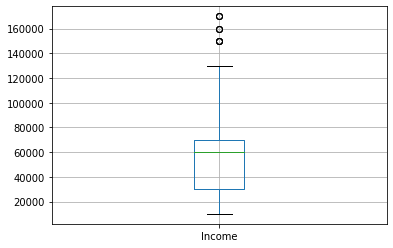

In [ ]:
df1['bike'].value_counts()
df1.boxplot(column=['Income'])

In [ ]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size= 0.25)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((750, 6), (250, 6), (750, 1), (250, 1))

In [ ]:
lgr = LogisticRegression()


In [ ]:
lgr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
Y_pred_lgr= lgr.predict(X_test)

In [ ]:
accuracy_score(Y_test, Y_pred_lgr)

0.504

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
Y_pred=knn.predict(X_test)

In [ ]:
accuracy_score(Y_pred,Y_test)

0.684

In [ ]:
k={}
for i in range(1,16):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    k[i]=accuracy_score(Y_pred,Y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
k

{1: 0.676,
 2: 0.62,
 3: 0.652,
 4: 0.644,
 5: 0.652,
 6: 0.612,
 7: 0.648,
 8: 0.608,
 9: 0.656,
 10: 0.592,
 11: 0.6,
 12: 0.584,
 13: 0.596,
 14: 0.58,
 15: 0.604}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_cv=RF.predict(X_test)
accuracy_score(Y_test,pred_cv)

0.656